<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLV_Using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


In [3]:
data = pd.read_excel("online_retail_II.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [4]:
df1 = data["Year 2009-2010"]
df2 = data["Year 2010-2011"]

In [5]:
df = df1.append(df2) #combining the data

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [8]:
df.shape

(1067371, 8)

**Exploratory data analysis (EDA) **

Let us have a look at the data and decide whether we need any data cleaning and data transformation for further analysis.

NULL values

In [9]:
print('Number of missing values in the dataset:', df.isnull().sum().sum())
print('Percentage of missing values in the dataset:', df.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: 247389
Percentage of missing values in the dataset: 2.897176801693132


In [10]:
print("Number of missing values in 'Description' column:", df['Description'].isnull().sum())
print("Percentage of missing values in 'Description' column:", df['Description'].isnull().sum()*100/df.shape[0])

Number of missing values in 'Description' column: 4382
Percentage of missing values in 'Description' column: 0.4105414143723223


In [11]:
print("Number of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum())
print("Percentage of missing values in 'CustomerID' column:", df['CustomerID'].isnull().sum()*100/df.shape[0])

Number of missing values in 'CustomerID' column: 243007
Percentage of missing values in 'CustomerID' column: 22.766872999172733



Number of missing values in 'CustomerID' column: 135080
Percentage of missing values in 'CustomerID' column: 24.926694334288598
About 25% of CustomerIDs is missing

**Duplicates**

In [12]:
# Check the number of duplicated values
df.duplicated().sum().sum()

34335

In [13]:
# Let's get the duplicated rows
duplicates = df[df.duplicated()]

In [14]:
  duplicates[:20]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
390,489517,84951A,S/4 PISTACHIO LOVEBIRD COASTERS,1,2009-12-01 11:34:00,2.55,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
394,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
657,489529,22028,PENNY FARTHING BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom
658,489529,22036,DINOSAUR BIRTHDAY CARD,12,2009-12-01 11:51:00,0.42,17984.0,United Kingdom


**Number of unique customers**

In [15]:
df['CustomerID'].nunique()

5942

**Number of purchases**

In [17]:
df['Invoice'].nunique()

53628

**Period of Time**

In [18]:
df['InvoiceDate'].min()

Timestamp('2009-12-01 07:45:00')

In [19]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

**Country**

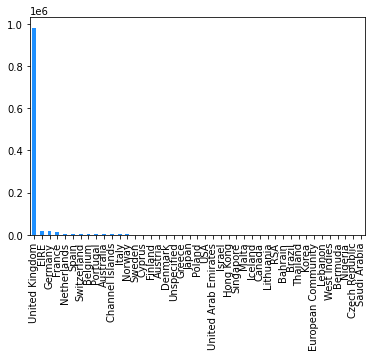

In [20]:
df['Country'].value_counts().plot.bar(color='dodgerblue')

In [21]:
df['Country'].nunique()

43

**Quantity and unit price of the products**

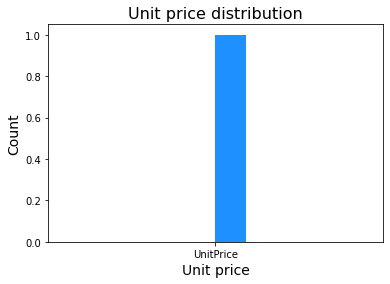

In [22]:
# Let's look at the price distribution of the products

plt.hist(data=df, x='UnitPrice', color='dodgerblue')
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Unit price distribution", fontsize=16);

In [24]:
df['Price'].describe(percentiles=[.99])

count    1.067371e+06
mean     4.649388e+00
std      1.235531e+02
min     -5.359436e+04
50%      2.100000e+00
99%      1.800000e+01
max      3.897000e+04
Name: Price, dtype: float64

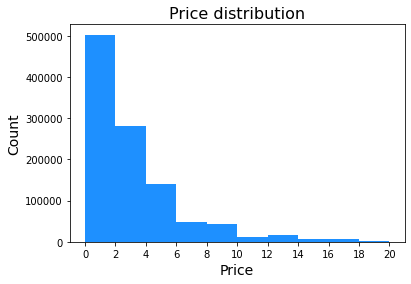

In [25]:
bins = np.arange(0, 21, 2)
ticks = np.arange(0, 21, 2)
plt.hist(data=df, x='Price', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Price distribution', fontsize=16);

In [26]:
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


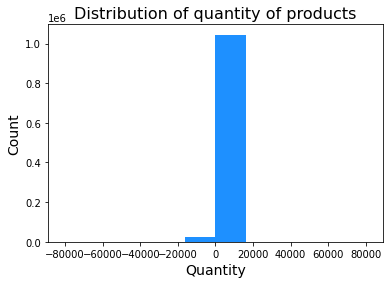

In [27]:
# Let's look at the quantity of the products

plt.hist(data=df, x='Quantity', color='dodgerblue')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

In [28]:
df['Quantity'].describe(percentiles=[.99])

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
50%      3.000000e+00
99%      1.000000e+02
max      8.099500e+04
Name: Quantity, dtype: float64

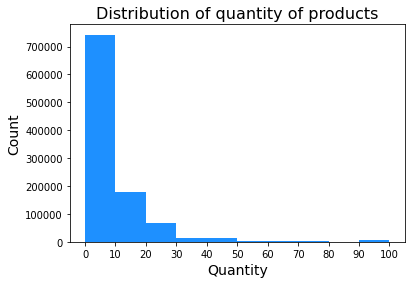

In [29]:
bins = np.arange(0, 110, 10)
ticks = np.arange(0, 110, 10)
plt.hist(data=df, x='Quantity', bins=bins, color='dodgerblue')
plt.xticks(ticks, ticks)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

In [30]:
neg_quantity = df[df['Quantity']<0]

In [31]:
neg_quantity.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [32]:
neg_quantity.shape

(22950, 8)

In [33]:
print("The percentage of records with negative Quantity:", neg_quantity.shape[0]*100/df.shape[0])

The percentage of records with negative Quantity: 2.1501427338760375


**Data cleaning and transformation**

Dropping NULL values

In [34]:
df.dropna(subset=['CustomerID'], inplace=True)

In [35]:
df.shape

(824364, 8)

In [36]:
# Let's check NULL records in the CustomerId column
df['CustomerID'].isnull().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


**Handle negative quantity**

In [38]:
df = df.loc[df['Quantity'] > 0]

In [39]:
# Let's check negative records
df[df['Quantity'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country


**Removing Rows with Negative Price**

In [41]:
df = df.loc[df['Price'] > 0]

In [42]:
# Let's check negative records
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country


**Handling Incomplete Data**

In [43]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [44]:
# Let's check the time period
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-11-30 17:37:00'))

**Calculating Total Sales**

In [45]:
df['Sales'] = df['Quantity'] * df['Price']

In [46]:
df_orders = df.groupby(['CustomerID', 'Invoice']).agg({'Sales': sum, 'InvoiceDate': max})

In [47]:
df_orders.head(8)

Sales         InvoiceDate
CustomerID Invoice                           
12346.0    491725    45.0 2009-12-14 08:34:00
           491742    22.5 2009-12-14 11:00:00
           491744    22.5 2009-12-14 11:02:00
           492718    22.5 2009-12-18 10:47:00
           492722     1.0 2009-12-18 10:55:00
           493410    22.5 2010-01-04 09:24:00
           493412    22.5 2010-01-04 09:53:00
           494450    22.5 2010-01-14 13:50:00

In [48]:
df_orders['InvoiceDate'].max(), df_orders['InvoiceDate'].min()

(Timestamp('2011-11-30 17:37:00'), Timestamp('2009-12-01 07:45:00'))

**Data Analysis**

In [49]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [50]:
df_summary = df_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })

In [51]:
df_summary.head()

Sales            ...       InvoiceDate                   
               min       max  ... purchase_duration purchase_frequency
CustomerID                    ...                                     
12346.0       1.00  77183.60  ...               400          33.333333
12347.0     382.52   1423.58  ...               364          52.000000
12348.0     222.16    892.80  ...               362          72.400000
12349.0     200.00   1757.55  ...               570         142.500000
12350.0     334.40    334.40  ...                 0           0.000000

[5 rows x 9 columns]

**Repeat customers**

Number of purchases

In [52]:
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]

In [53]:
df_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,1.00,77183.60,77556.46,6463.038333,12,2009-12-14 08:34:00,2011-01-18 10:01:00,400,33.333333
12347.0,382.52,1423.58,5408.50,772.642857,7,2010-10-31 14:20:00,2011-10-31 12:25:00,364,52.000000
12348.0,222.16,892.80,2019.40,403.880000,5,2010-09-27 14:59:00,2011-09-25 13:13:00,362,72.400000
12349.0,200.00,1757.55,4428.69,1107.172500,4,2010-04-29 13:20:00,2011-11-21 09:51:00,570,142.500000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18283.0,1.95,313.65,2528.65,120.411905,21,2010-02-19 17:16:00,2011-11-30 12:59:00,648,30.857143
18284.0,461.68,461.68,461.68,461.680000,1,2010-10-04 11:33:00,2010-10-04 11:33:00,0,0.000000
18285.0,427.00,427.00,427.00,427.000000,1,2010-02-17 10:24:00,2010-02-17 10:24:00,0,0.000000


In [54]:
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [55]:
df_summary.shape

(4123, 9)

Text(0.5, 1.0, 'Number of purchases made by repeat customers')

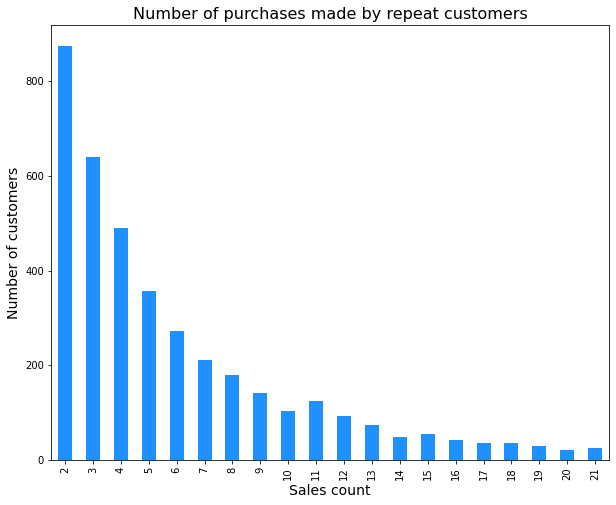

In [56]:
# Let's look at the number of purchases
ax = df_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='dodgerblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('Sales count', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Number of purchases made by repeat customers', fontsize=16)

**Average number of days between purchases**

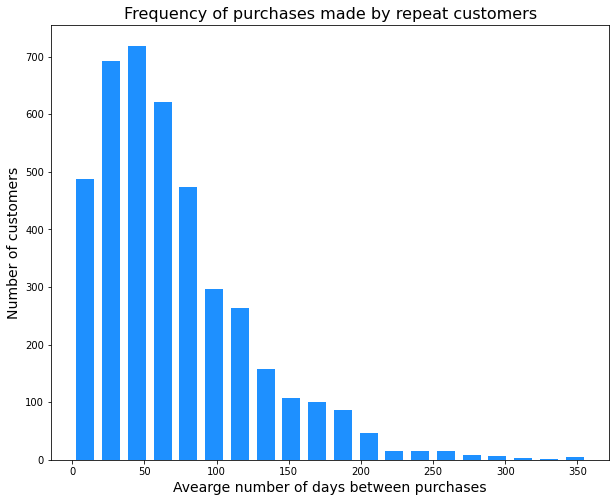

In [57]:
ax = df_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='dodgerblue',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avearge number of days between purchases', fontsize=14)
plt.ylabel('Number of customers', fontsize=14)
plt.title('Frequency of purchases made by repeat customers', fontsize=16);

**Predict 3-month CLTV**

In [58]:
clv_freq = '3M'

In [59]:
df_data = df_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})

In [60]:
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]

In [61]:
df_data = df_data.reset_index()

In [62]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2009-12-31,113.50,22.700,5
1,12346.0,2010-03-31,117.05,23.410,5
2,12346.0,2010-06-30,142.31,142.310,1
3,12346.0,2011-03-31,77183.60,77183.600,1
4,12347.0,2010-12-31,2035.11,1017.555,2


In [63]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17869 entries, 0 to 17868
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerID   17869 non-null  float64       
 1   InvoiceDate  17869 non-null  datetime64[ns]
 2   sales_sum    17869 non-null  float64       
 3   sales_avg    17869 non-null  float64       
 4   sales_count  17869 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 698.1 KB


In [64]:
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}

In [65]:
map_date_month

{'2009-12-31': 'M_9',
 '2010-03-31': 'M_8',
 '2010-06-30': 'M_7',
 '2010-09-30': 'M_6',
 '2010-12-31': 'M_5',
 '2011-03-31': 'M_4',
 '2011-06-30': 'M_3',
 '2011-09-30': 'M_2',
 '2011-12-31': 'M_1'}

In [66]:
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])

In [67]:
df_data.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2009-12-31,113.50,22.700,5,M_9
1,12346.0,2010-03-31,117.05,23.410,5,M_8
2,12346.0,2010-06-30,142.31,142.310,1,M_7
3,12346.0,2011-03-31,77183.60,77183.600,1,M_4
4,12347.0,2010-12-31,2035.11,1017.555,2,M_5


In [68]:
# Number of purchases made in each chunk
df_data['M'].value_counts()

M_5    2670
M_1    2406
M_2    2161
M_6    2060
M_7    2047
M_3    1991
M_8    1803
M_4    1776
M_9     955
Name: M, dtype: int64

In [69]:
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['sales_sum', 'sales_avg', 'sales_count'], 
                columns='M', 
                index='CustomerID')

In [70]:
df_features.reset_index()

CustomerID   sales_avg           ... sales_sum                
M                       M_2      M_3  ...       M_7     M_8     M_9
0       12346.0         NaN      NaN  ...    142.31  117.05  113.50
1       12347.0  584.910000  509.385  ...       NaN     NaN     NaN
2       12348.0  310.000000  367.000  ...       NaN     NaN     NaN
3       12349.0         NaN      NaN  ...   1268.52     NaN     NaN
4       12350.0         NaN      NaN  ...       NaN     NaN     NaN
...         ...         ...      ...  ...       ...     ...     ...
5433    18283.0   92.696667  131.170  ...       NaN  354.42     NaN
5434    18284.0         NaN      NaN  ...       NaN     NaN     NaN
5435    18285.0         NaN      NaN  ...       NaN  427.00     NaN
5436    18286.0         NaN      NaN  ...       NaN     NaN  462.95
5437    18287.0         NaN  765.280  ...   1071.61     NaN     NaN

[5438 rows x 25 columns]

In [71]:
df_features.columns = ['_'.join(col) for col in df_features.columns]

In [72]:
df_features.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,77183.60,NaN,NaN,142.31,23.41,22.7,NaN,NaN,1.0,NaN,NaN,1.0,5.0,5.0,NaN,NaN,77183.60,NaN,NaN,142.31,117.05,113.5
12347.0,584.91,509.385,475.39,1017.555,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,584.91,1018.77,475.39,2035.11,NaN,NaN,NaN,NaN
12348.0,310.00,367.000,227.44,892.800,222.16,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,310.00,367.00,227.44,892.80,222.16,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,1402.620,NaN,634.26,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1402.62,NaN,1268.52,NaN,NaN
12350.0,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN


In [73]:
df_features.reset_index(level=0, inplace=True)

In [74]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
0,12346.0,NaN,NaN,77183.60,NaN,NaN,142.31,23.41,22.7,NaN,NaN,1.0,NaN,NaN,1.0,5.0,5.0,NaN,NaN,77183.60,NaN,NaN,142.31,117.05,113.5
1,12347.0,584.91,509.385,475.39,1017.555,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,584.91,1018.77,475.39,2035.11,NaN,NaN,NaN,NaN
2,12348.0,310.00,367.000,227.44,892.800,222.16,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,310.00,367.00,227.44,892.80,222.16,NaN,NaN,NaN
3,12349.0,NaN,NaN,NaN,1402.620,NaN,634.26,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1402.62,NaN,1268.52,NaN,NaN
4,12350.0,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN


In [75]:
df_features.fillna(0, inplace=True)

In [76]:
# Let's check the Null values
df_features.isnull().sum().sum()

0

In [77]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5438 non-null   float64
 1   sales_avg_M_2    5438 non-null   float64
 2   sales_avg_M_3    5438 non-null   float64
 3   sales_avg_M_4    5438 non-null   float64
 4   sales_avg_M_5    5438 non-null   float64
 5   sales_avg_M_6    5438 non-null   float64
 6   sales_avg_M_7    5438 non-null   float64
 7   sales_avg_M_8    5438 non-null   float64
 8   sales_avg_M_9    5438 non-null   float64
 9   sales_count_M_2  5438 non-null   float64
 10  sales_count_M_3  5438 non-null   float64
 11  sales_count_M_4  5438 non-null   float64
 12  sales_count_M_5  5438 non-null   float64
 13  sales_count_M_6  5438 non-null   float64
 14  sales_count_M_7  5438 non-null   float64
 15  sales_count_M_8  5438 non-null   float64
 16  sales_count_M_9  5438 non-null   float64
 17  sales_sum_M_2 

In [78]:
df_features.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
0,12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,0.0,1.0,0.0,0.0,1.0,5.0,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5
1,12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0
2,12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0
3,12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0
4,12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0


In [79]:
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]

In [80]:
df_target.columns = ['CustomerID', 'CLV_'+clv_freq]

In [81]:
df_target.shape

(2406, 2)

In [82]:
df_target.head()

,CustomerID,CLV_3M
8,12347.0,1294.32
16,12349.0,1757.55
22,12352.0,311.73
31,12356.0,58.35
33,12357.0,6207.67


In [83]:
df_sample_set = df_features.merge(
                df_target, 
                left_on='CustomerID', 
                right_on='CustomerID',
                how='left')

In [84]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,CLV_3M
0,12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,0.0,1.0,0.0,0.0,1.0,5.0,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5,NaN
1,12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,1294.32
2,12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0,NaN
3,12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0,1757.55
4,12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0,NaN


In [85]:
df_sample_set.fillna(0, inplace=True)

In [86]:
df_sample_set.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,CLV_3M
0,12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,0.0,1.0,0.0,0.0,1.0,5.0,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5,0.00
1,12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,1294.32
2,12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0,0.00
3,12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0,1757.55
4,12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0,0.00


In [87]:
df_sample_set['CLV_3M'].describe()

count     5438.000000
mean       363.622587
std       1951.861150
min          0.000000
25%          0.000000
50%          0.000000
75%        307.215000
max      68012.350000
Name: CLV_3M, dtype: float64

**Building Linear Regression**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]

In [90]:
all_features

['sales_avg_M_2',
 'sales_avg_M_3',
 'sales_avg_M_4',
 'sales_avg_M_5',
 'sales_avg_M_6',
 'sales_avg_M_7',
 'sales_avg_M_8',
 'sales_avg_M_9',
 'sales_count_M_2',
 'sales_count_M_3',
 'sales_count_M_4',
 'sales_count_M_5',
 'sales_count_M_6',
 'sales_count_M_7',
 'sales_count_M_8',
 'sales_count_M_9',
 'sales_sum_M_2',
 'sales_sum_M_3',
 'sales_sum_M_4',
 'sales_sum_M_5',
 'sales_sum_M_6',
 'sales_sum_M_7',
 'sales_sum_M_8',
 'sales_sum_M_9']

In [91]:
df_sample_set

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_count_M_6,sales_count_M_7,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.000,0.00,142.31,23.41,22.70,0.0,0.0,1.0,0.0,0.0,1.0,5.0,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.50,0.00
1,12347.0,584.910000,509.385,475.390000,1017.555,0.00,0.00,0.00,0.00,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.00,1294.32
2,12348.0,310.000000,367.000,227.440000,892.800,222.16,0.00,0.00,0.00,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.00,0.00
3,12349.0,0.000000,0.000,0.000000,1402.620,0.00,634.26,0.00,0.00,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.00,1757.55
4,12350.0,0.000000,0.000,334.400000,0.000,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5433,18283.0,92.696667,131.170,105.966667,97.675,92.00,0.00,118.14,0.00,3.0,4.0,3.0,2.0,1.0,0.0,3.0,0.0,278.09,524.68,317.90,195.35,92.00,0.00,354.42,0.00,766.21
5434,18284.0,0.000000,0.000,0.000000,461.680,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,461.68,0.00,0.00,0.00,0.00,0.00
5435,18285.0,0.000000,0.000,0.000000,0.000,0.00,0.00,427.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,427.00,0.00,0.00
5436,18286.0,0.000000,0.000,0.000000,0.000,833.48,0.00,0.00,462.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,833.48,0.00,0.00,462.95,0.00


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features], 
                                    df_sample_set[target_var], 
                                    random_state=2,
                                    test_size=0.35)

In [93]:
lin_reg = LinearRegression(n_jobs=1)

In [94]:
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [95]:
lin_reg.intercept_

63.34386079215784

In [96]:
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [97]:
coef

,feature,coef
0,sales_avg_M_2,-0.019503
1,sales_avg_M_3,0.383985
2,sales_avg_M_4,-0.492991
3,sales_avg_M_5,-0.404774
4,sales_avg_M_6,-0.181756
5,sales_avg_M_7,-0.064752
6,sales_avg_M_8,-0.056369
7,sales_avg_M_9,0.550061
8,sales_count_M_2,117.946133
9,sales_count_M_3,61.024052


**Evaluating the model**

In [98]:
from sklearn.metrics import r2_score, median_absolute_error

In [99]:
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

**R-Squared**

In [100]:
print('R-Squared for Train set: %0.2f' % r2_score(y_true=y_train, y_pred=train_preds))
print('R-Squared for Test set: %0.2f' % r2_score(y_true=y_test, y_pred=test_preds))

R-Squared for Train set: 0.88
R-Squared for Test set: 0.57


**MAE**

In [101]:
print('MedAE for Train set: %0.2f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('MedAE for Test set: %0.2f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

MedAE for Train set: 137.13
MedAE for Test set: 141.01


**Scatter Plot**

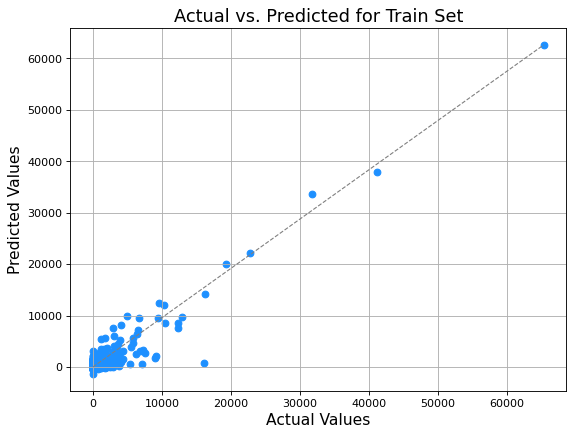

In [102]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train, train_preds, color='dodgerblue')
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Train Set', fontsize=16)
plt.grid()

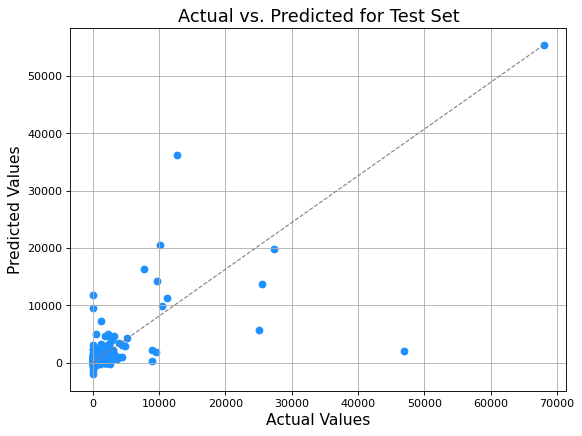

In [103]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='dodgerblue')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()

As you can see on this plot, the x-axis is the actual values and the y-axis represents the predicted values. Closer the dots are located to the straight diagonal line, better predictions are.




**Summary**

Based on the data analysis, we found that the repeat customers tend to make about 12 purchases or less within a year and the majority of repeat customers tend to make a purchase every 12 to 50 days
We predicted 3-month CLTV for customers of the online retail using linear regression
R-squared value for the test set is 0.71, which is not great but it is a good benchmark to try other regression models such as Epsilon-Support Vector Regression and Random Forest Regressor
By knowing CLTV, we can develop positive ROI strategies and make decisions about how much money to invest in acquiring new customers and retaining existing one